In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize

sys.path.append('/Users/xiangshi/Documents/GitHub/normix/')

from normix.gig import GIG
from normix.func import logkv

%matplotlib inline

In [2]:
g = GIG(lam=1.3, chi=0.3, psi=1.5)

In [3]:
n = 100000
x = g.rvs(n)

In [10]:
g_fit = GIG(lam=1, chi=1, psi=1)
g_fit.fit(x[:10000])

 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 138
      cg_stop_cond: 2
            constr: [array([1.22739619, 0.35001347, 1.4748381 ])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.32024312019348145
               fun: 0.8749837332028993
              grad: array([-2.12230252e-06,  4.66738746e-07,  9.40446937e-08])
               jac: [<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([-2.11161180e-06,  5.03007521e-08,  6.34744086e-08])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 59
              nhev: 0
               nit: 90
             niter: 90
              njev: 59
        optimality: 2.111611802894486e-06
            status: 2
           success: True
       

In [11]:
print(g.lam, g.chi, g.psi)
print(g_fit.lam, g_fit.chi, g_fit.psi)

1.3 0.3 1.5
1.2273961874724613 0.35001346542029527 1.4748381033083238


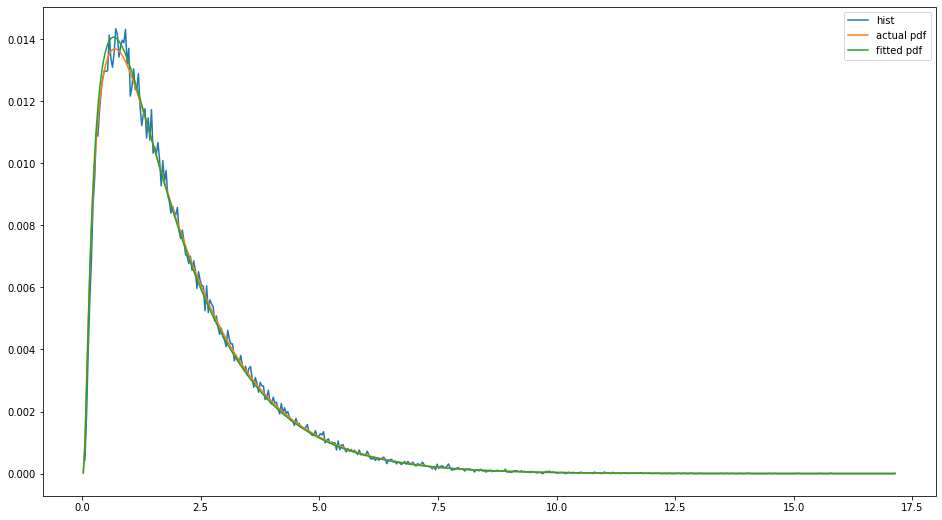

In [12]:
yhat, xi = np.histogram(x, bins=500)
p = g.pdf(xi)
p = p/np.sum(p)
p_fit = g_fit.pdf(xi)
p_fit = p_fit/np.sum(p_fit)

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(xi[1:], yhat/n, label='hist')
ax.plot(xi, p, label='actual pdf')
ax.plot(xi, p_fit, label='fitted pdf')
ax.legend()

In [17]:
print(np.mean(x), g.mean(), g_fit.mean())
print(np.var(x), g.var(), g_fit.var())

1.9392290609545213 1.9454499464092374 1.918407065428539
2.3670700980113923 2.3812710083379565 2.3516432681756347


In [19]:
print(np.mean(x**-1), np.mean(x), np.mean(np.log(x)))
print(g.suffstats())
print(g_fit.suffstats())

1.062515851516803 1.9392290609545213 0.3460875154585257
(1.060583065379525, 1.9454499464092374, 0.349371642727192)
(1.070094438667484, 1.918407065428539, 0.33409830457742373)
